In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import os

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\tapas\Desktop\Data Science Project\compas-scores-raw.csv')

In [3]:
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [4]:
print(df.shape)
display(df.columns)
df.head()

(60843, 28)


Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [5]:
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)

(0, 28)


In [6]:
df.dtypes

Person_ID                    int64
AssessmentID                 int64
Case_ID                      int64
Agency_Text                 object
LastName                    object
FirstName                   object
MiddleName                  object
Sex_Code_Text               object
Ethnic_Code_Text            object
DateOfBirth                 object
ScaleSet_ID                  int64
ScaleSet                    object
AssessmentReason            object
Language                    object
LegalStatus                 object
CustodyStatus               object
MaritalStatus               object
Screening_Date              object
RecSupervisionLevel          int64
RecSupervisionLevelText     object
Scale_ID                     int64
DisplayText                 object
RawScore                   float64
DecileScore                  int64
ScoreText                   object
AssessmentType              object
IsCompleted                  int64
IsDeleted                    int64
dtype: object

In [7]:
df.Agency_Text.unique()

array(['PRETRIAL', 'Probation', 'DRRD', 'Broward County'], dtype=object)

In [8]:
def num(s):
    try:
        return int(s)
    except ValueError:
        return float(s)

In [9]:
df["Ethnic_Code_Text"].unique()

array(['Caucasian', 'African-American', 'Hispanic', 'Other', 'Asian',
       'African-Am', 'Native American', 'Oriental', 'Arabic'],
      dtype=object)

In [10]:
df["LegalStatus"].unique()

array(['Pretrial', 'Post Sentence', 'Conditional Release', 'Other',
       'Probation Violator', 'Parole Violator', 'Deferred Sentencing'],
      dtype=object)

In [11]:
df["Language"].unique()

array(['English', 'Spanish'], dtype=object)

In [12]:
df["LegalStatus"].unique()

array(['Pretrial', 'Post Sentence', 'Conditional Release', 'Other',
       'Probation Violator', 'Parole Violator', 'Deferred Sentencing'],
      dtype=object)

In [13]:
df["DecileScore"].unique()

array([ 4,  2,  1,  3,  8,  7,  6, 10,  9,  5, -1], dtype=int64)

In [14]:
display(df.columns)

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

In [15]:
df["RawScore"].unique()

array([-2.08e+00, -1.06e+00,  1.50e+01, -2.84e+00, -1.50e+00,  1.90e+01,
       -1.20e+00,  1.80e-01,  1.30e+01, -1.29e+00, -5.30e-01,  1.10e+01,
       -2.90e+00, -1.55e+00,  1.60e+01, -1.33e+00,  7.10e-01,  2.40e+01,
       -3.01e+00, -1.74e+00, -1.44e+00,  3.80e-01,  2.00e+01, -3.03e+00,
       -1.21e+00, -2.69e+00, -1.31e+00, -9.20e-01,  6.00e-02, -3.15e+00,
       -1.66e+00,  1.80e+01, -3.14e+00, -1.67e+00, -2.33e+00, -1.00e+00,
       -2.20e+00, -5.70e-01, -3.63e+00, -2.11e+00, -2.28e+00, -1.98e+00,
       -3.60e-01, -3.00e+00, -7.50e-01, -3.52e+00, -1.54e+00, -1.99e+00,
       -2.00e-02, -8.90e-01,  7.90e-01, -2.62e+00, -9.00e-01,  1.40e+01,
       -1.18e+00, -3.23e+00, -1.79e+00, -1.50e-01,  3.10e-01,  2.80e+01,
       -2.80e+00,  0.00e+00,  2.10e+01, -1.87e+00,  4.80e-01,  4.90e-01,
       -1.36e+00,  5.70e-01,  2.20e+01, -2.09e+00,  4.10e-01, -2.40e+00,
       -1.10e-01,  2.50e+01, -2.94e+00, -1.56e+00, -4.28e+00, -2.61e+00,
       -1.62e+00, -2.60e-01, -1.90e+00,  1.70e+01, 

In [16]:
df["ScoreText"].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [17]:
df["AssessmentType"].unique()

array(['New', 'Copy'], dtype=object)

In [18]:
df["DisplayText"].unique()

array(['Risk of Violence', 'Risk of Recidivism',
       'Risk of Failure to Appear'], dtype=object)

In [19]:
df.drop('MiddleName', axis=1)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/05/92,22,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/05/92,22,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/05/92,22,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,09/16/84,22,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,09/16/84,22,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,Male,African-American,06/21/64,22,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0
60839,65667,79665,72038,Probation,West,James,Male,African-American,06/21/64,22,...,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,Male,Caucasian,02/06/85,22,...,1,Low,7,Risk of Violence,-2.75,2,Low,New,1,0
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,Male,Caucasian,02/06/85,22,...,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0


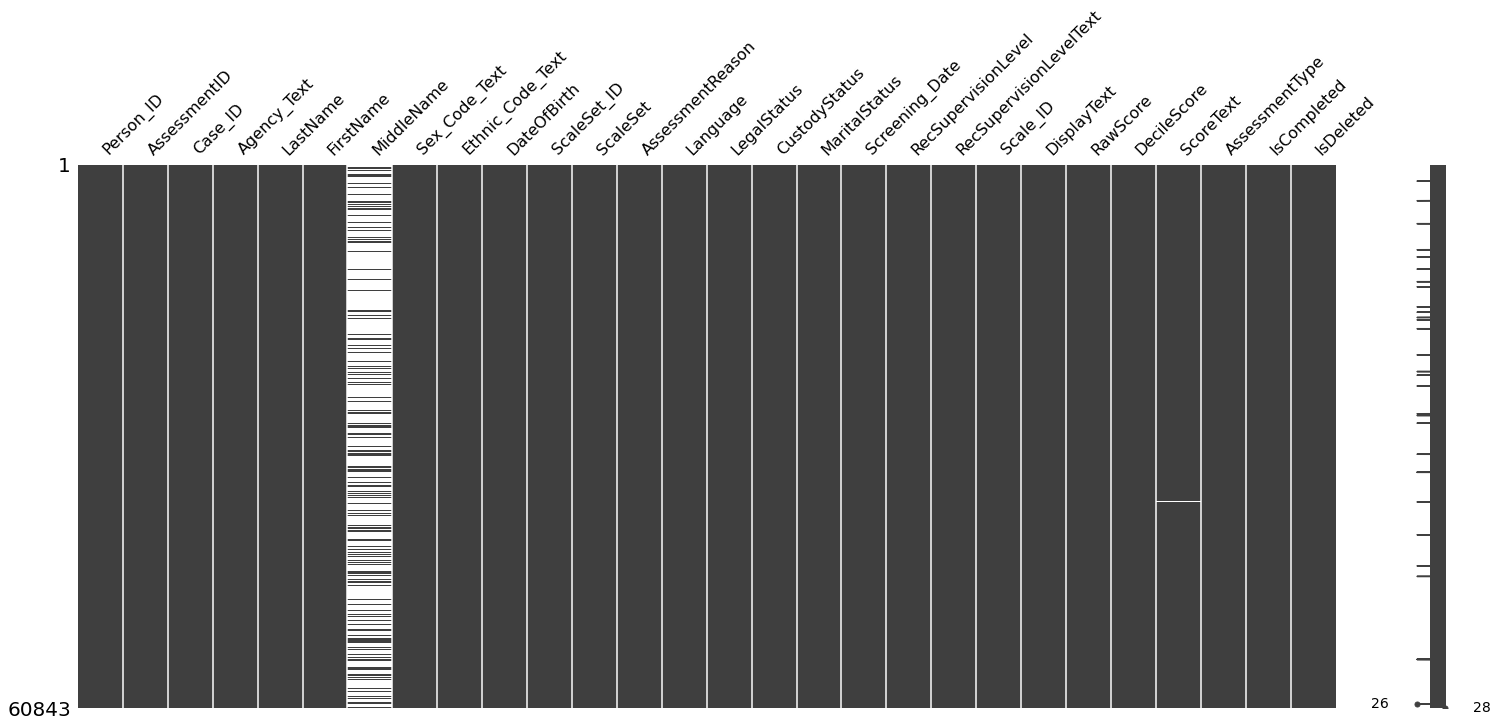

In [20]:
import missingno as msno

msno.matrix(df);

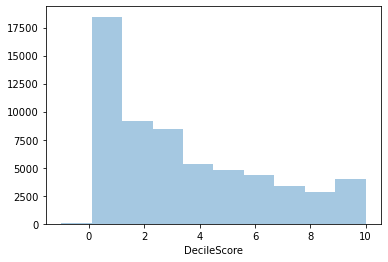

In [21]:
sns.distplot(df["DecileScore"], hist=True,  kde=False, bins=10)

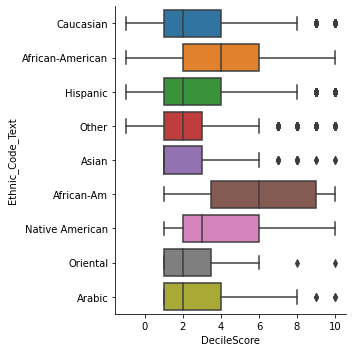

In [22]:
sns.catplot(x="DecileScore", y="Ethnic_Code_Text", data=df, kind="box")

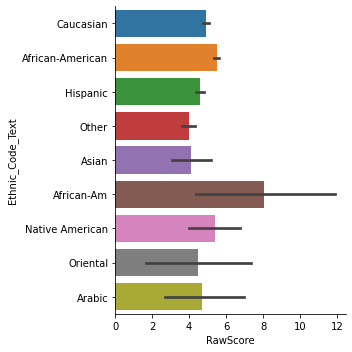

In [23]:
sns.catplot(x="RawScore", y="Ethnic_Code_Text", data=df, kind="bar")

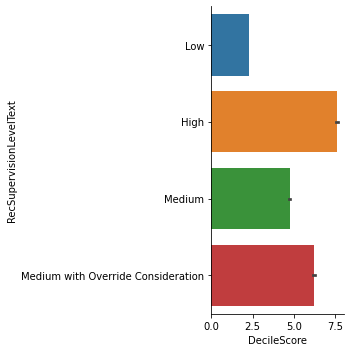

In [24]:
sns.catplot(x="DecileScore", y="RecSupervisionLevelText", data=df, kind="bar")

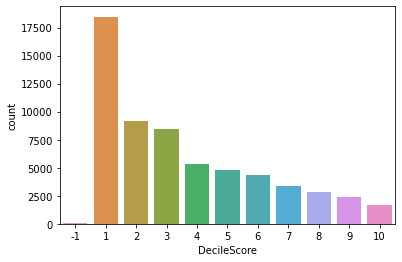

In [25]:
sns.countplot(x="DecileScore", data=df)

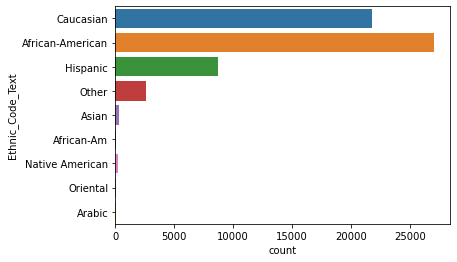

In [26]:
ax = sns.countplot(y="Ethnic_Code_Text", data=df)

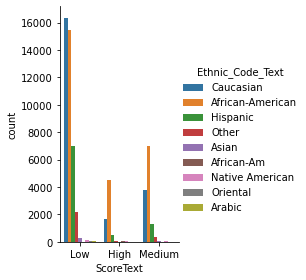

In [27]:
sns.catplot(x="ScoreText", hue="Ethnic_Code_Text",
                data=df, kind="count",
                height=4, aspect=.7);

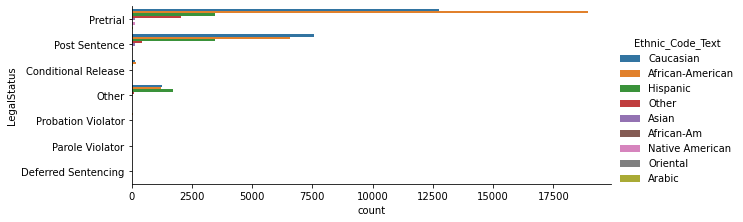

In [28]:
sns.catplot(y="LegalStatus", hue="Ethnic_Code_Text",
                data=df, kind="count",
                height=3, aspect=3);

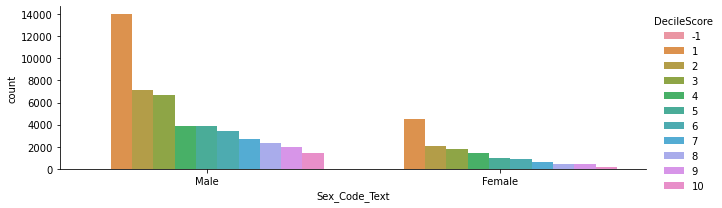

In [29]:
sns.catplot(x="Sex_Code_Text", hue="DecileScore",
                data=df, kind="count",
                height=3, aspect=3);

In [30]:
df["RecSupervisionLevelText"].unique()

array(['Low', 'High', 'Medium', 'Medium with Override Consideration'],
      dtype=object)

In [31]:
df["AssessmentType"].unique()

array(['New', 'Copy'], dtype=object)

In [32]:
df["ScoreText"].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [33]:
display(df.columns)

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

In [34]:
numerical= ['IsCompleted', 'IsDeleted', 'Scale_ID', 'RecSupervisionLevel', 'RawScore', 'DecileScore']

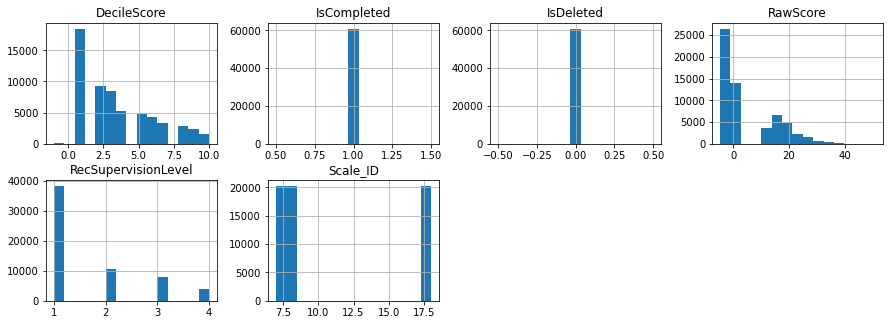

In [35]:
df[numerical].hist(bins=15, figsize=(15, 8), layout=(3, 4));

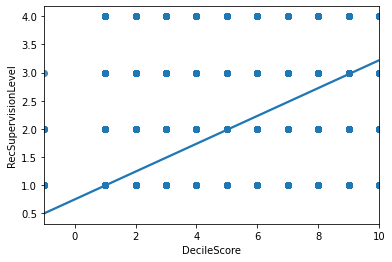

In [36]:
sns.regplot("DecileScore", "RecSupervisionLevel", data=df);

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'C:\Users\tapas\Desktop\Data Science Project\compas-scores-raw.csv')
df.head()
df.describe()

df.to_csv(r'C:\Users\tapas\Desktop\Data Science Project\compas-scores-raw.csv', index=False)

In [38]:
from IPython.display import Image
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(rc={'figure.figsize':(6,5)}) 
import warnings
warnings.simplefilter("ignore")

df = pd.read_csv(r'C:\Users\tapas\Desktop\Data Science Project\compas-scores-raw.csv')

In [39]:
import pandas
my_data_frame = pandas.read_csv(r'C:\Users\tapas\Desktop\Data Science Project\compas-scores-raw.csv')

In [40]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 

In [41]:
df.keys()

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

In [42]:
import sklearn as sk
import pandas as pd

In [43]:
#x= df.drop(['Agency_Text', 'DisplayText', 'MiddleName', 'Sex_Code_Text'], axis=1)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df = pd.read_csv(r'C:\Users\tapas\Desktop\Data Science Project\compas-scores-raw.csv')
df.drop("Agency_Text", axis=1)

,Person_ID,AssessmentID,Case_ID,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,West,James,NaN,Male,African-American,06/21/64,22,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,1,0
60839,65667,79665,72038,West,James,NaN,Male,African-American,06/21/64,22,...,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New,1,0
60840,68603,79669,72042,Ryan,Michael,NaN,Male,Caucasian,02/06/85,22,...,1,Low,7,Risk of Violence,-2.75,2,Low,New,1,0
60841,68603,79669,72042,Ryan,Michael,NaN,Male,Caucasian,02/06/85,22,...,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New,1,0


In [46]:
y = df['DisplayText'] 
x = df['Ethnic_Code_Text']  
#x = df.drop('DisplayText', axis = 1)

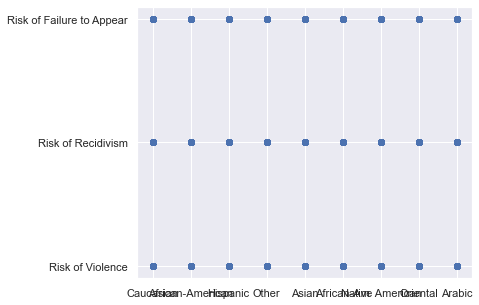

In [47]:
plt.scatter(x,y)
plt.show()

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

27054    African-American
12359            Hispanic
19972           Caucasian
21126            Hispanic
29379           Caucasian
Name: Ethnic_Code_Text, dtype: object

In [49]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

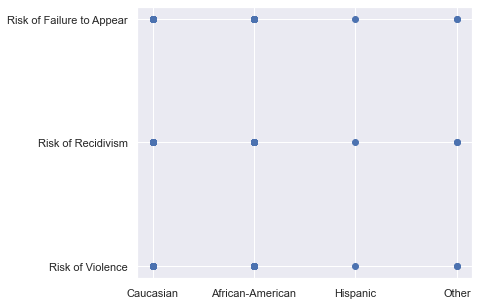

In [50]:
plt.scatter(train_x, train_y)
plt.show()

In [51]:
x_test.shape

(12169,)

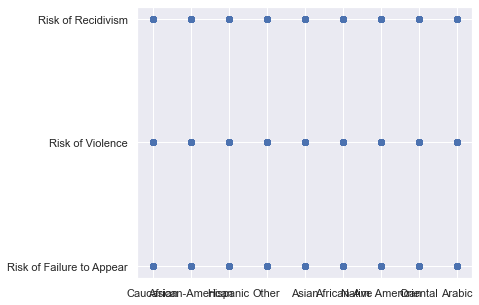

In [52]:
plt.scatter(test_x, test_y)
plt.show()

In [53]:
#X = df.iloc[:, 0:4].values
#y = df.iloc[:, 4].values

In [54]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
#df = pd.read_csv(r'C:\Users\tapas\Desktop\Data Science Project\compas-scores-raw.csv') 
#y = df['DisplayText'] 
  
#x = df.drop(['DisplayText', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text', 'DateOfBirth', 'Language', 'Screening_Date', 'AssessmentType'], axis = 1) 
#X = X.drop(['MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text', 'DateOfBirth', 'Language', 'Screening_Date', 'AssessmentType'], axis = 1)


In [56]:
#import sklearn as sk
#from sklearn.ensemble import RandomForestClassifier

In [57]:
#RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
#RF.fit(X, y)
#RF.predict(X.iloc[460:,:])
#round(RF.score(X,y), 4)

In [58]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test',  x_test.shape)
print('y_test',  y_test.shape)

x_train (48674,)
y_train (48674,)
x_test (12169,)
y_test (12169,)


In [59]:
#from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [60]:
df.isnull().sum()

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
dtype: int64

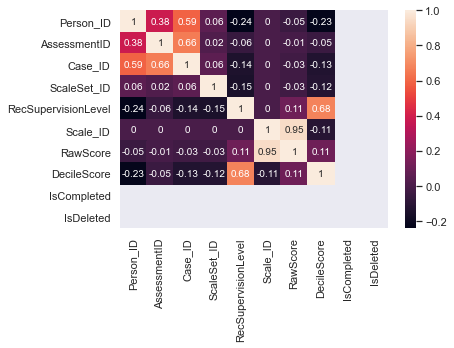

In [61]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

#The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.
#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

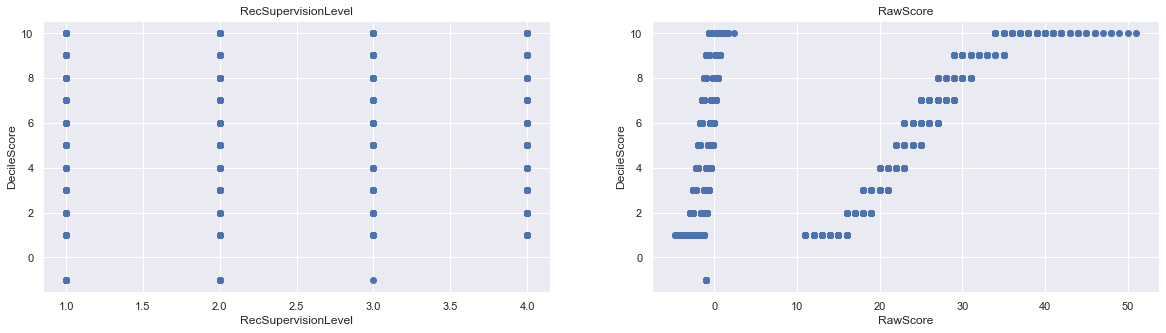

In [62]:
plt.figure(figsize=(20, 5))

features = ['RecSupervisionLevel', 'RawScore']
target = df['DecileScore']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('DecileScore')

In [63]:
X = pd.DataFrame(np.c_[df['RecSupervisionLevel'], df['RawScore']], columns = ['RecSupervisionLevel','RawScore'])
Y = df['DecileScore']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(48674, 2)
(12169, 2)
(48674,)
(12169,)


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [66]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))
print("\n")


y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set:")
print('RMSE is {}'.format(rmse))

The model performance for training set:
RMSE is 1.9042705319115256


The model performance for testing set:
RMSE is 1.9110489862086508


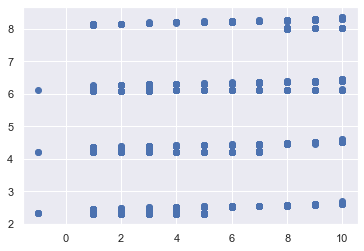

In [67]:
plt.scatter(Y_test, y_test_predict)
plt.show()

In [68]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [235]:
df = pd.read_csv(r'C:\Users\tapas\Desktop\Data Science Project\compas-scores-raw.csv').query("ScoreText=='High'")
df.shape

(6823, 28)

In [236]:
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
6,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,...,4,High,7,Risk of Violence,-1.20,8,High,New,1,0
7,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,...,4,High,8,Risk of Recidivism,0.18,8,High,New,1,0
16,50852,57179,51961,PRETRIAL,Holland,Terrance,NaN,Male,Hispanic,01/11/84,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.71,10,High,New,1,0
22,50853,57178,51960,PRETRIAL,Brown,Devaughn,NaN,Male,African-American,07/25/93,...,3,Medium with Override Consideration,8,Risk of Recidivism,0.38,9,High,New,1,0
30,50843,57166,51949,PRETRIAL,Davis,Michael,Lavon,Male,African-American,11/08/93,...,3,Medium with Override Consideration,7,Risk of Violence,-0.92,9,High,New,1,0


In [237]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import warnings
warnings.simplefilter("ignore")

In [238]:
from sklearn import preprocessing
from collections import defaultdict

In [166]:
df.isna().sum()

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
dtype: int64

In [168]:
df = df.drop("MiddleName", axis=1)
df.isna().sum()

Person_ID                   0
AssessmentID                0
Case_ID                     0
Agency_Text                 0
LastName                    0
FirstName                   0
Sex_Code_Text               0
Ethnic_Code_Text            0
DateOfBirth                 0
ScaleSet_ID                 0
ScaleSet                    0
AssessmentReason            0
Language                    0
LegalStatus                 0
CustodyStatus               0
MaritalStatus               0
Screening_Date              0
RecSupervisionLevel         0
RecSupervisionLevelText     0
Scale_ID                    0
DisplayText                 0
RawScore                    0
DecileScore                 0
ScoreText                  45
AssessmentType              0
IsCompleted                 0
dtype: int64

In [277]:
target_variable = "DecileScore" 

independent_variables = df.drop(target_variable, axis=1) # feature variables
target_variable = df[target_variable]

In [285]:
df_AT = df.DisplayText.astype("category")
df_numerical = df.select_dtypes(np.number).fillna(0)

df_AT
df_numerical.head()

,Person_ID,AssessmentID,Case_ID,ScaleSet_ID,RecSupervisionLevel,Scale_ID,RawScore,DecileScore,IsDeleted,target
6,50855,57181,51963,22,4,7,-1.20,8,0,0
7,50855,57181,51963,22,4,8,0.18,8,0,0
16,50852,57179,51961,22,3,8,0.71,10,0,0
22,50853,57178,51960,22,3,8,0.38,9,0,0
30,50843,57166,51949,22,3,7,-0.92,9,0,0


In [286]:
df['target'] = df['IsCompleted'].apply(lambda x: 1 if x == 'yes' else 0)

In [243]:
df.target.value_counts()

0    6823
Name: target, dtype: int64

In [287]:
df.drop('IsCompleted',axis=1,inplace=True)

In [288]:
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
try:
    for i in list(d.keys()):
        df[i] = d[i].transform(df[i].fillna('NA'))
          return self._engine.get_loc(key)
except KeyError:
            return("Error")

IndentationError: unexpected indent (<ipython-input-288-aafd718d288f>, line 10)

In [289]:
features = df[df.columns.difference(['target'])]
labels = df['target']

In [290]:
categorical_columns = independent_variables.select_dtypes([object, "category"]).columns
numerical_columns= independent_variables.select_dtypes(np.number).columns

In [291]:
categorical_data_codified = pd.get_dummies(categorical_data, drop_first=True, dtype="int64")

In [292]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [293]:
from sklearn.metrics import f1_score

In [294]:
df_AT.cat.codes

6        2
7        1
16       1
22       1
30       2
        ..
60820    1
60821    0
60833    0
60838    1
60839    0
Length: 6823, dtype: int8

In [295]:
X_train, X_test, y_train, y_test = train_test_split(df_AT, df_AT.cat.codes, test_size=0.20)

In [296]:
k_categories = len(y_train.unique())
k_categories

3

knn_classifier = KNeighborsClassifier(n_neighbors=3, 
                                        weights="uniform")

knn_classifier.fit(X_train, y_train)

from sklearn.metrics import f1_score
predictions = knn_classifier.predict(X_test)
f1_score(y_test, predictions, average="macro")

            y = check_array(y, **check_y_params)
              else:
                 X, y = check_X_y(X, y, **check_params)
             out = X, y
             
#Unexpected Errors

In [297]:
from IPython.display import Image
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
data = pd.read_csv(r'C:\Users\tapas\Desktop\Data Science Project\compas-scores-raw.csv')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [298]:
from IPython.display import Image
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 

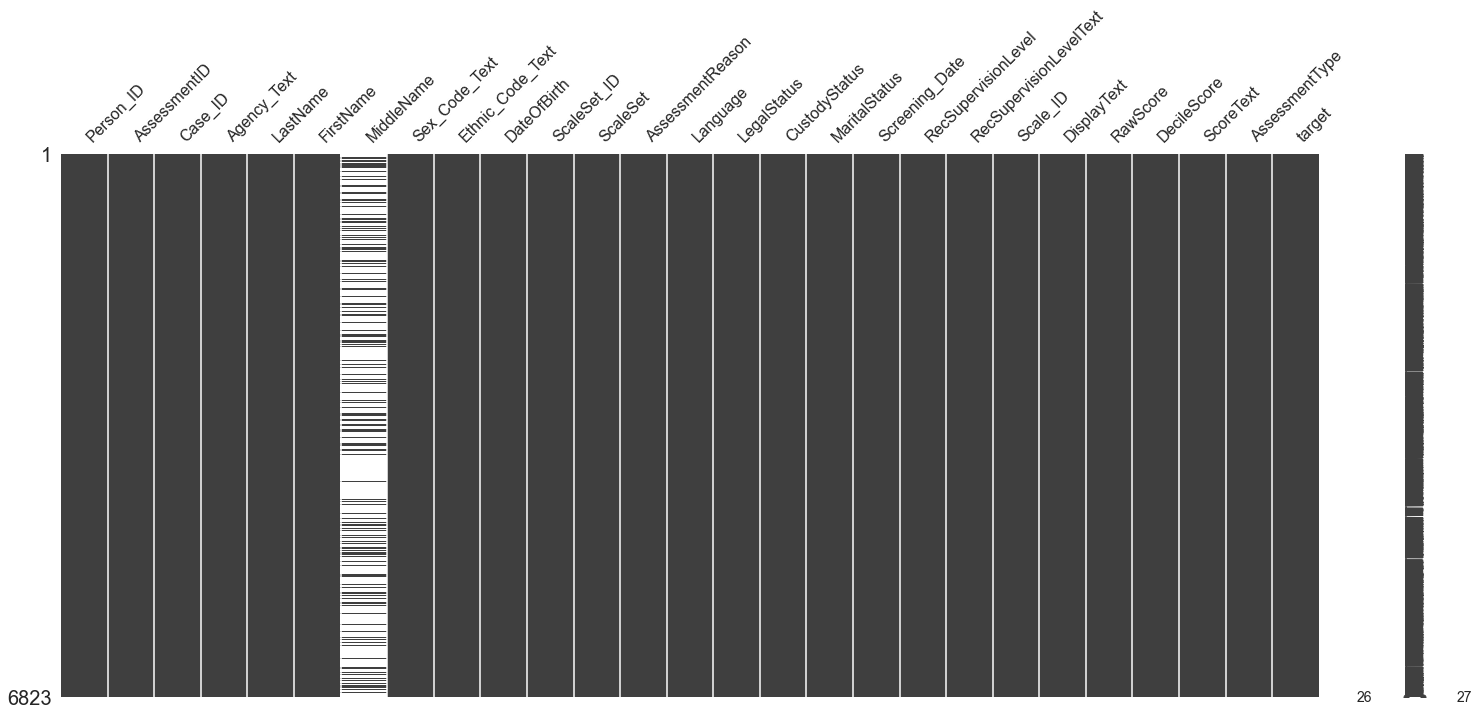

In [299]:
import missingno as msno 
   
msno.matrix(df) 

In [300]:
df.isna().sum()

Person_ID                     0
AssessmentID                  0
Case_ID                       0
Agency_Text                   0
LastName                      0
FirstName                     0
MiddleName                 4848
Sex_Code_Text                 0
Ethnic_Code_Text              0
DateOfBirth                   0
ScaleSet_ID                   0
ScaleSet                      0
AssessmentReason              0
Language                      0
LegalStatus                   0
CustodyStatus                 0
MaritalStatus                 0
Screening_Date                0
RecSupervisionLevel           0
RecSupervisionLevelText       0
Scale_ID                      0
DisplayText                   0
RawScore                      0
DecileScore                   0
ScoreText                     0
AssessmentType                0
target                        0
dtype: int64

In [301]:
df.drop('MiddleName', axis=1)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,...,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,target
6,50855,57181,51963,PRETRIAL,DAYES,DANIEL,Male,African-American,08/25/94,22,...,1/1/13 0:00,4,High,7,Risk of Violence,-1.20,8,High,New,0
7,50855,57181,51963,PRETRIAL,DAYES,DANIEL,Male,African-American,08/25/94,22,...,1/1/13 0:00,4,High,8,Risk of Recidivism,0.18,8,High,New,0
16,50852,57179,51961,PRETRIAL,Holland,Terrance,Male,Hispanic,01/11/84,22,...,1/1/13 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.71,10,High,New,0
22,50853,57178,51960,PRETRIAL,Brown,Devaughn,Male,African-American,07/25/93,22,...,1/1/13 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.38,9,High,New,0
30,50843,57166,51949,PRETRIAL,Davis,Michael,Male,African-American,11/08/93,22,...,1/1/13 0:00,3,Medium with Override Consideration,7,Risk of Violence,-0.92,9,High,New,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60820,68599,79662,72037,PRETRIAL,PENTO,MELISSA,Female,Caucasian,04/08/82,22,...,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.06,8,High,New,0
60821,68599,79662,72037,PRETRIAL,PENTO,MELISSA,Female,Caucasian,04/08/82,22,...,12/31/14 0:00,3,Medium with Override Consideration,18,Risk of Failure to Appear,27.00,8,High,New,0
60833,19968,39866,36500,PRETRIAL,BUTTERFIELD,JAMES,Male,Caucasian,09/24/73,22,...,12/31/14 0:00,1,Low,18,Risk of Failure to Appear,30.00,8,High,New,0
60838,65667,79665,72038,Probation,West,James,Male,African-American,06/21/64,22,...,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New,0


In [303]:
target_variable = "DecileScore"
independent_variables = df_numerical.drop(columns=target_variable).columns

In [310]:
df.DecileScore.value_counts(True)

8     0.41023
9     0.34970
10    0.24007
Name: DecileScore, dtype: float64

In [312]:
X = df[independent_variables]
y = df.DecileScore


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['IsDeleted'] not in index"

In [305]:
print(X_train.shape)
print(y_train.shape)

#testing set
print(X_test.shape)
print(y_test.shape)

(5458,)
(5458,)
(1365,)
(1365,)


In [306]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

# = DecisionTreeClassifier()

In [314]:
dt = tree.DecisionTreeClassifier()
dt.fit(X, y)

ValueError: could not convert string to float: 'PRETRIAL'

In [308]:
#tree.predict(df[independent_variables])[:10]

dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile)
dotfile.close()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.